<a href="https://colab.research.google.com/github/KPorus/NLP-LLM--Learning-/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regretion

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
from sklearn import linear_model
import io
# from word2number import w2n

In [ ]:
uploaded = files.upload()

Saving hiring.csv to hiring (2).csv


In [ ]:
file_content = uploaded.get('hiring (2).csv')

if file_content:
    # decoded_content = file_content.decode('utf-8')
    # print(decoded_content)
    # Read the CSV data into a pandas DataFrame
    df = pd.read_csv(io.BytesIO(file_content))

    # Display the DataFrame as a table
    print(df)
else:
    print("File not found.")



  experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0        NaN                    8.0                           9      50000
1        NaN                    8.0                           6      45000
2       five                    6.0                           7      60000
3        two                   10.0                          10      65000
4      seven                    9.0                           6      70000
5      three                    7.0                          10      62000
6        ten                    NaN                           7      72000
7     eleven                    7.0                           8      80000


In [ ]:
df[f'test_score(out of 10)'] = (df[f'test_score(out of 10)'].fillna(df[f'test_score(out of 10)'].mean()))
# print(df[f'test_score(out of 10)'])

# Map string representations to integers
word_to_int = {'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5,
               'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10, 'eleven': 11}

# Convert strings to integers and handle NaNs
df['experience'] = df['experience'].map(word_to_int).fillna(-1).astype(int)
#fillna(-1) replaces NaN with -1 for easy identification, then cast the column to integer type

print(df)

0     8.000000
1     8.000000
2     6.000000
3    10.000000
4     9.000000
5     7.000000
6     7.857143
7     7.000000
Name: test_score(out of 10), dtype: float64
0       NaN
1       NaN
2      five
3       two
4     seven
5     three
6       ten
7    eleven
Name: experience, dtype: object
   experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0          -1               8.000000                           9      50000
1          -1               8.000000                           6      45000
2           5               6.000000                           7      60000
3           2              10.000000                          10      65000
4           7               9.000000                           6      70000
5           3               7.000000                          10      62000
6          10               7.857143                           7      72000
7          11               7.000000                           8      80000


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df.drop('salary($)',axis='columns'), df['salary($)'])
print(reg.coef_)
print(reg.intercept_)

[2610.18423274 1849.48095311 1935.81590653]
21477.984628545513


In [ ]:
reg.predict([[9,2,2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([52540.23644251])

#Gradient Decent

In [ ]:
import numpy as np
from google.colab import files
import io
import pandas as pd

In [ ]:
uploaded = files.upload()

Saving test_scores.csv to test_scores.csv


In [ ]:
files_content = uploaded.get('test_scores.csv')

if files_content:
  df = pd.read_csv(io.BytesIO(files_content))
  print(df)
else:
  print("File not found.")



     name  math  cs
0   david    92  98
1   laura    56  68
2  sanjay    88  81
3     wei    70  80
4    jeff    80  83
5   aamir    49  52
6  venkat    65  66
7   virat    35  30
8  arthur    66  68
9    paul    67  73


In [ ]:
df.drop('name', axis='columns', inplace=True)
df

KeyError: "['name'] not found in axis"

In [ ]:
import math
x= np.array(df['math'])
y= np.array(df['cs'])
print(x,y)
def gradient_descent(x,y):
  m_curr = b_curr = 0
  rate=0.1
  n=len(x)
  iterations = 10
  prev_cost = float('inf')
  for i in range(iterations):
    y_predicted = m_curr * x + b_curr
    cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
    md = -(2/n)*sum(x*(y-y_predicted))
    bd = -(2/n)*sum(y-y_predicted)
    m_curr = m_curr - rate * md
    b_curr = b_curr - rate * bd
    print(f"m={m_curr}, b={b_curr}, cost={cost}, iteration={i}")
    if math.isclose(cost, prev_cost, rel_tol=1e-10):
      break
    prev_cost = cost
  return m_curr, b_curr, cost

m,b,cost = gradient_descent(x,y)
print (f"m={m}, b={b}, cost={cost}")

[92 56 88 70 80 49 65 35 66 67] [98 68 81 80 83 52 66 30 68 73]
m=989.1800000000002, b=13.980000000000002, cost=5199.1, iteration=0
m=-934764.0368, b=-13190.280800000002, cost=4624176649.337042, iteration=1
m=884277037.336928, b=12477909.287008, cost=4138149214106179.5, iteration=2
m=-836515925792.161, b=-11803958877.411753, cost=3.7032060698742374e+21, iteration=3
m=791334463505817.5, b=11166409601495.324, cost=3.3139779370946647e+27, iteration=4
m=-7.485933188160774e+17, b=-1.0563295304756512e+16, cost=2.965659906666545e+33, iteration=5
m=7.081606865615178e+20, b=9.992756103138988e+18, cost=2.6539520929098406e+39, iteration=6
m=-6.699118805714214e+23, b=-9.453032567579368e+21, cost=2.37500655271612e+45, iteration=7
m=6.33728949159553e+26, b=8.942460298380127e+24, cost=2.1253797838000865e+51, iteration=8
m=-5.995003113846916e+29, b=-8.459464792532926e+27, cost=1.9019902156564862e+57, iteration=9
m=-5.995003113846916e+29, b=-8.459464792532926e+27, cost=1.9019902156564862e+57


#One hot loading

In [ ]:
import io
from sklearn.linear_model import LinearRegression
from google.colab import files
import pandas as pd

In [ ]:
uploaded = files.upload()

Saving homeprices.csv to homeprices (1).csv


In [ ]:
files_content = uploaded.get('homeprices (1).csv')

if files_content:
  df = pd.read_csv(io.BytesIO(files_content))
  print(df)
else:
  print("File not found.")
#

               town  area   price
0   monroe township  2600  550000
1   monroe township  3000  565000
2   monroe township  3200  610000
3   monroe township  3600  680000
4   monroe township  4000  725000
5      west windsor  2600  585000
6      west windsor  2800  615000
7      west windsor  3300  650000
8      west windsor  3600  710000
9       robinsville  2600  575000
10      robinsville  2900  600000
11      robinsville  3100  620000
12      robinsville  3600  695000


In [ ]:
dummies = pd.get_dummies(df.town, dtype=int)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [ ]:
df.drop('town',axis='columns',inplace=True)

In [ ]:
df = pd.concat([df, dummies],axis='columns')
df

,area,price,monroe township,robinsville,west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0
5,2600,585000,0,0,1
6,2800,615000,0,0,1
7,3300,650000,0,0,1
8,3600,710000,0,0,1
9,2600,575000,0,1,0


In [ ]:
y = df.price
x = df.drop(['price','monroe township'], axis='columns')
print(x,y)

    area  robinsville  west windsor
0   2600            0             0
1   3000            0             0
2   3200            0             0
3   3600            0             0
4   4000            0             0
5   2600            0             1
6   2800            0             1
7   3300            0             1
8   3600            0             1
9   2600            1             0
10  2900            1             0
11  3100            1             0
12  3600            1             0 0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64


In [ ]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [ ]:
model.predict([[2800,0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([605103.20361213])

#Using sklearn OneHotEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
upload1 = files.upload()

Saving homeprices.csv to homeprices (3).csv


In [ ]:
file_content = upload1.get('homeprices (3).csv')
if file_content:
  df = pd.read_csv(io.BytesIO(file_content))
  print(df)
else:
  print("File missing ")
le = LabelEncoder()
dfle = df
dfle.town = le.fit_transform(dfle.town)
dfle

               town  area   price
0   monroe township  2600  550000
1   monroe township  3000  565000
2   monroe township  3200  610000
3   monroe township  3600  680000
4   monroe township  4000  725000
5      west windsor  2600  585000
6      west windsor  2800  615000
7      west windsor  3300  650000
8      west windsor  3600  710000
9       robinsville  2600  575000
10      robinsville  2900  600000
11      robinsville  3100  620000
12      robinsville  3600  695000


,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [ ]:
x = dfle[['town','area']].values
y = dfle.price.values
print(x,y)

[[   0 2600]
 [   0 3000]
 [   0 3200]
 [   0 3600]
 [   0 4000]
 [   2 2600]
 [   2 2800]
 [   2 3300]
 [   2 3600]
 [   1 2600]
 [   1 2900]
 [   1 3100]
 [   1 3600]] [550000 565000 610000 680000 725000 585000 615000 650000 710000 575000
 600000 620000 695000]


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# ohe = OneHotEncoder(categorical_features=[0])
ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder='passthrough')

In [ ]:
x = ct.fit_transform(x)
x

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [ ]:
x = x[:,1:]
x

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [ ]:
model.fit(x,y)

LinearRegression()

In [ ]:
model.predict([[0,1,2800]])

array([605103.20361213])

In [ ]:
model.score(x,y)

0.9573929037221873

##Practice

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from google.colab import files
import io
import pandas as pd

In [ ]:
uploaded = files.upload()

Saving carprices.csv to carprices.csv


                Car Model  Mileage  Sell Price($)  Age(yrs)
0                  BMW X5    69000          18000         6
1                  BMW X5    35000          34000         3
2                  BMW X5    57000          26100         5
3                  BMW X5    22500          40000         2
4                  BMW X5    46000          31500         4
5                 Audi A5    59000          29400         5
6                 Audi A5    52000          32000         5
7                 Audi A5    72000          19300         6
8                 Audi A5    91000          12000         8
9   Mercedez Benz C class    67000          22000         6
10  Mercedez Benz C class    83000          20000         7
11  Mercedez Benz C class    79000          21000         7
12  Mercedez Benz C class    59000          33000         5


<Axes: xlabel='Age(yrs)', ylabel='Sell Price($)'>

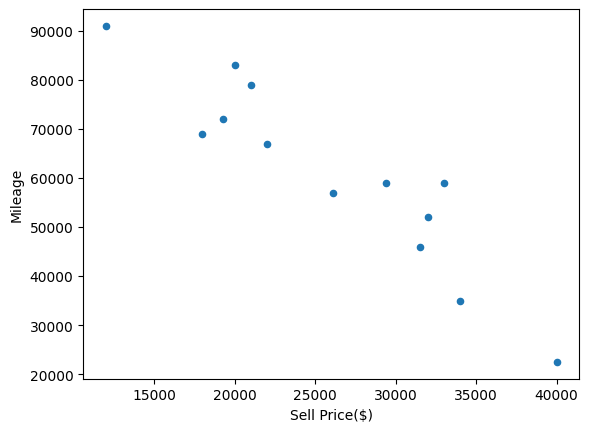

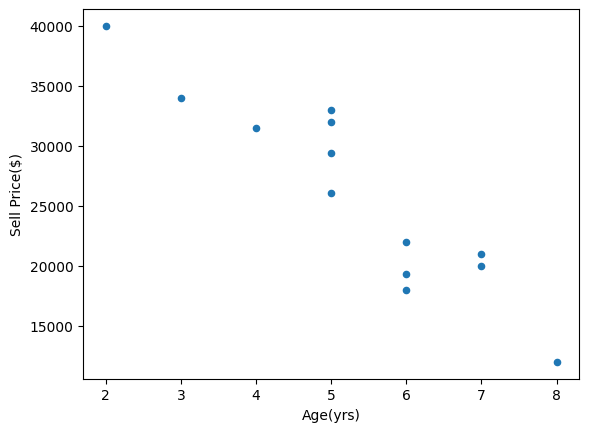

In [ ]:
file_content = uploaded.get('carprices.csv')

if file_content:
  df = pd.read_csv(io.BytesIO(file_content))
  print(df)
else:
  print("File not found.")

df.plot(kind='scatter', x='Sell Price($)', y='Mileage')
df.plot(kind='scatter',x='Age(yrs)', y= 'Sell Price($)')

In [ ]:
le = LabelEncoder()
dfle = df
dfle['Car Model'] = le.fit_transform(dfle['Car Model'])
dfle

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [ ]:
x = dfle[['Car Model','Mileage','Age(yrs)']].values
y = dfle['Sell Price($)'].values
print(x,y)

[[    1 69000     6]
 [    1 35000     3]
 [    1 57000     5]
 [    1 22500     2]
 [    1 46000     4]
 [    0 59000     5]
 [    0 52000     5]
 [    0 72000     6]
 [    0 91000     8]
 [    2 67000     6]
 [    2 83000     7]
 [    2 79000     7]
 [    2 59000     5]] [18000 34000 26100 40000 31500 29400 32000 19300 12000 22000 20000 21000
 33000]


In [ ]:
ct = ColumnTransformer([('Car Model', OneHotEncoder(), [0])], remainder='passthrough')
x = ct.fit_transform(x)
x

array([[0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04,
        6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04,
        3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04,
        5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04,
        2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04,
        4.00e+00],
       [1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04,
        5.00e+00],
       [1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04,
        5.00e+00],
       [1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04,
        6.00e+00],
       [1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04,
        8.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04,
        6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04,
        7.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 0.00e

In [ ]:
x = x[:,2:]
x

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [ ]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [ ]:
model.score(x,y)

0.9417050937281082

In [ ]:
model.predict([[0,0,91000,8]]) # BMW, Mercides

array([12182.34562103])

#spliting train set and test set

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from google.colab import files
import numpy as np
import io
import pandas as pd
le=LabelEncoder()
model = LinearRegression()

In [ ]:
uploaded = files.upload()

Saving carprices.csv to carprices.csv


In [ ]:
file_content = uploaded.get('carprices.csv')

if file_content:
  df = pd.read_csv(io.BytesIO(file_content))
  print(df)
else:
  print("File not found.")
#

                Car Model  Mileage  Sell Price($)  Age(yrs)
0                  BMW X5    69000          18000         6
1                  BMW X5    35000          34000         3
2                  BMW X5    57000          26100         5
3                  BMW X5    22500          40000         2
4                  BMW X5    46000          31500         4
5                 Audi A5    59000          29400         5
6                 Audi A5    52000          32000         5
7                 Audi A5    72000          19300         6
8                 Audi A5    91000          12000         8
9   Mercedez Benz C class    67000          22000         6
10  Mercedez Benz C class    83000          20000         7
11  Mercedez Benz C class    79000          21000         7
12  Mercedez Benz C class    59000          33000         5


In [ ]:
dfle = df
dfle['Car Model'] = le.fit_transform(dfle['Car Model'])
dfle

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dfle[['Car Model','Mileage','Age(yrs)']],dfle['Sell Price($)'],test_size=0.2)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

    Car Model  Mileage  Age(yrs)
11          2    79000         7
0           1    69000         6
9           2    67000         6
2           1    57000         5
7           0    72000         6
8           0    91000         8
10          2    83000         7
1           1    35000         3
3           1    22500         2
6           0    52000         5
    Car Model  Mileage  Age(yrs)
5           0    59000         5
12          2    59000         5
4           1    46000         4
11    21000
0     18000
9     22000
2     26100
7     19300
8     12000
10    20000
1     34000
3     40000
6     32000
Name: Sell Price($), dtype: int64
5     29400
12    33000
4     31500
Name: Sell Price($), dtype: int64


In [ ]:
x_train =np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[    2 79000     7]
 [    1 69000     6]
 [    2 67000     6]
 [    1 57000     5]
 [    0 72000     6]
 [    0 91000     8]
 [    2 83000     7]
 [    1 35000     3]
 [    1 22500     2]
 [    0 52000     5]]
[[    0 59000     5]
 [    2 59000     5]
 [    1 46000     4]]
[21000 18000 22000 26100 19300 12000 20000 34000 40000 32000]
[29400 33000 31500]


In [ ]:
ct = ColumnTransformer([('Car Model', OneHotEncoder(),[0])], remainder='passthrough')
x_train = ct.fit_transform(x_train)
x_train = x_train[:,1:]
x_test = ct.transform(x_test)
x_test = x_test[:,1:]
print(x_train)
print(x_test)

[[0.00e+00 1.00e+00 7.90e+04 7.00e+00]
 [0.00e+00 0.00e+00 5.90e+04 5.00e+00]
 [0.00e+00 1.00e+00 8.30e+04 7.00e+00]
 [0.00e+00 0.00e+00 5.20e+04 5.00e+00]
 [1.00e+00 0.00e+00 6.90e+04 6.00e+00]
 [1.00e+00 0.00e+00 2.25e+04 2.00e+00]
 [0.00e+00 1.00e+00 5.90e+04 5.00e+00]
 [0.00e+00 0.00e+00 9.10e+04 8.00e+00]
 [0.00e+00 1.00e+00 6.70e+04 6.00e+00]
 [1.00e+00 0.00e+00 5.70e+04 5.00e+00]]
[[0.0e+00 0.0e+00 7.2e+04 6.0e+00]
 [1.0e+00 0.0e+00 3.5e+04 3.0e+00]
 [1.0e+00 0.0e+00 4.6e+04 4.0e+00]]


In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
model.score(x_train,y_train)

0.934725177764033

In [ ]:
model.predict(x_test)
# model.predict([[0,0,72000,6]])

array([24081.33859899, 26056.38106022, 30529.7706403 ])

##logical Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from google.colab import files
import io
import pandas as pd
import numpy as np
le = LabelEncoder()
model = LogisticRegression()

In [ ]:
uploaded = files.upload()

Saving HR_comma_sep.csv to HR_comma_sep (2).csv


In [ ]:
file_content = uploaded.get('HR_comma_sep (2).csv')

if file_content:
  df = pd.read_csv(io.BytesIO(file_content))
  print(df)
else:
  print("File not found.")
#

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272            

In [ ]:
left = df[df.left==1]
left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
retention = df[df.left==0]
retention

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


In [ ]:
df.groupby('left').mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<Axes: xlabel='Department'>

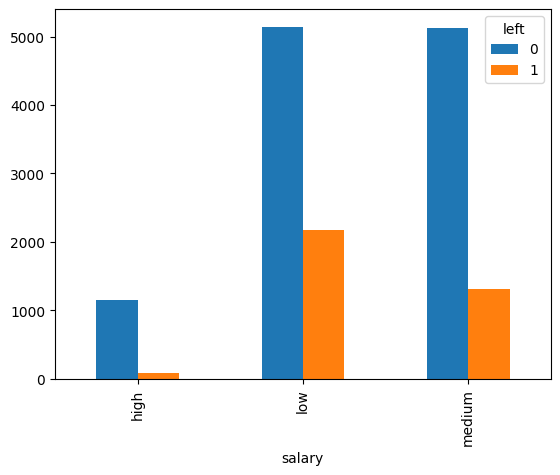

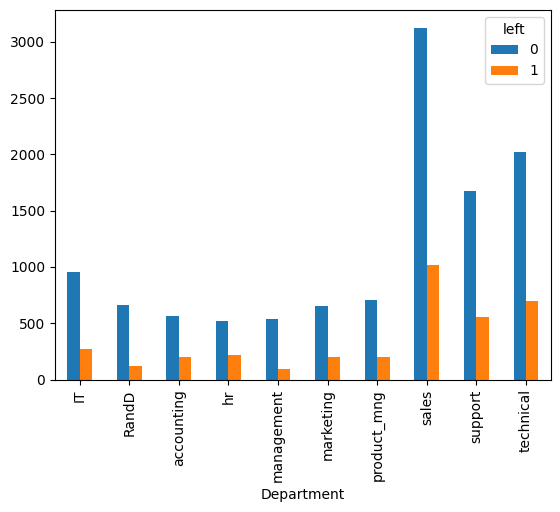

In [ ]:
pd.crosstab(df.salary,df.left).plot(kind='bar')
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [ ]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
14994,0.40,151,0,low
14995,0.37,160,0,low
14996,0.37,143,0,low
14997,0.11,280,0,low


In [ ]:
subdf.salary = le.fit_transform(subdf.salary)
subdf

<ipython-input-12-a24b542d4e19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf.salary = le.fit_transform(subdf.salary)


,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,1
1,0.80,262,0,2
2,0.11,272,0,2
3,0.72,223,0,1
4,0.37,159,0,1
...,...,...,...,...
14994,0.40,151,0,1
14995,0.37,160,0,1
14996,0.37,143,0,1
14997,0.11,280,0,1


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(subdf[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']],df.left,train_size=0.8)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

       satisfaction_level  average_montly_hours  promotion_last_5years  salary
7906                 0.23                   139                      0       2
11594                0.83                   271                      0       2
4464                 0.60                   201                      0       2
10309                0.61                   161                      0       0
3394                 0.99                   259                      0       1
...                   ...                   ...                    ...     ...
12074                0.11                   277                      0       2
12941                0.74                   210                      0       1
10149                0.80                   148                      0       2
423                  0.40                   143                      0       0
11308                0.83                   247                      0       1

[11999 rows x 4 columns]
       satisfaction_level 

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[2.30e-01 1.39e+02 0.00e+00 2.00e+00]
 [8.30e-01 2.71e+02 0.00e+00 2.00e+00]
 [6.00e-01 2.01e+02 0.00e+00 2.00e+00]
 ...
 [8.00e-01 1.48e+02 0.00e+00 2.00e+00]
 [4.00e-01 1.43e+02 0.00e+00 0.00e+00]
 [8.30e-01 2.47e+02 0.00e+00 1.00e+00]]
[[9.00e-02 2.54e+02 0.00e+00 1.00e+00]
 [9.40e-01 2.23e+02 0.00e+00 2.00e+00]
 [8.10e-01 1.61e+02 0.00e+00 2.00e+00]
 ...
 [5.00e-01 1.71e+02 0.00e+00 1.00e+00]
 [8.40e-01 1.31e+02 0.00e+00 2.00e+00]
 [6.60e-01 2.54e+02 0.00e+00 2.00e+00]]
[0 0 0 ... 0 1 0]
[1 0 1 ... 0 0 0]


In [ ]:
ct = ColumnTransformer([('salary', OneHotEncoder(),[0])], remainder='passthrough')
x_train = ct.fit_transform(x_train)
x_train = x_train[:,2:]
x_test = ct.transform(x_test)
x_test = x_test[:,2:]
print(x_train)
print(x_test)

[[1.00e+00 2.30e-01 1.39e+02 0.00e+00]
 [1.00e+00 8.30e-01 2.71e+02 0.00e+00]
 [1.00e+00 6.00e-01 2.01e+02 0.00e+00]
 ...
 [1.00e+00 8.00e-01 1.48e+02 0.00e+00]
 [0.00e+00 4.00e-01 1.43e+02 0.00e+00]
 [0.00e+00 8.30e-01 2.47e+02 0.00e+00]]
[[0.00e+00 9.00e-02 2.54e+02 0.00e+00]
 [1.00e+00 9.40e-01 2.23e+02 0.00e+00]
 [1.00e+00 8.10e-01 1.61e+02 0.00e+00]
 ...
 [0.00e+00 5.00e-01 1.71e+02 0.00e+00]
 [1.00e+00 8.40e-01 1.31e+02 0.00e+00]
 [1.00e+00 6.60e-01 2.54e+02 0.00e+00]]


In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
model.score(x_test,y_test)

0.77

In [ ]:
model.predict(x_test)

array([1, 0, 0, ..., 0, 0, 0])

#multiclass classification

In [ ]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
print(digits.images[0])
print(digits.data[2])
print(digits.target[2])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
[ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
  8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
 15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
  5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
2


<Figure size 640x480 with 0 Axes>

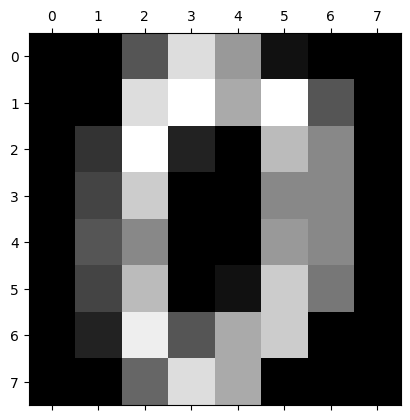

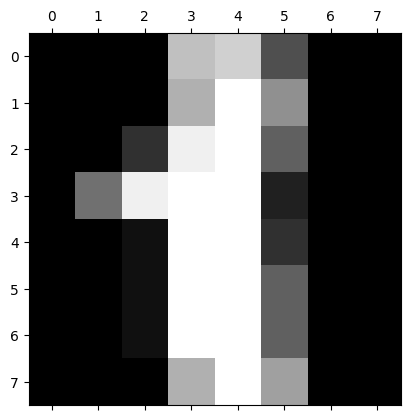

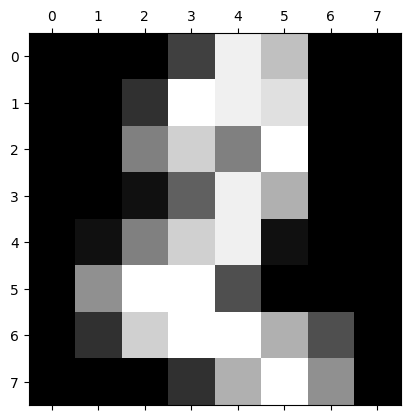

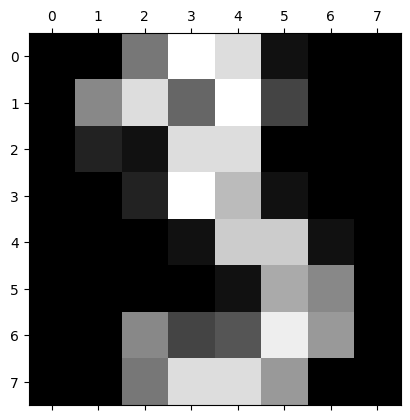

In [ ]:
from matplotlib import pyplot as plt
plt.gray()
for i in range(4):
  plt.matshow(digits.images[i]) # showing the images

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.2)

In [ ]:
model = LogisticRegression(max_iter=2000000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=2000000)

In [ ]:
model.score(x_test,y_test)

0.9722222222222222

In [ ]:
# model.predict(x_test)
digits.target[33]

5

In [ ]:
model.predict([digits.data[33]])

array([5])

In [ ]:
from sklearn.metrics import confusion_matrix
y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[41,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  1,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 43,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 35,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 28,  0,  1],
       [ 0,  0,  1,  0,  0,  0,  0,  0, 29,  1],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0, 33]])

Text(95.72222222222221, 0.5, 'Truth')

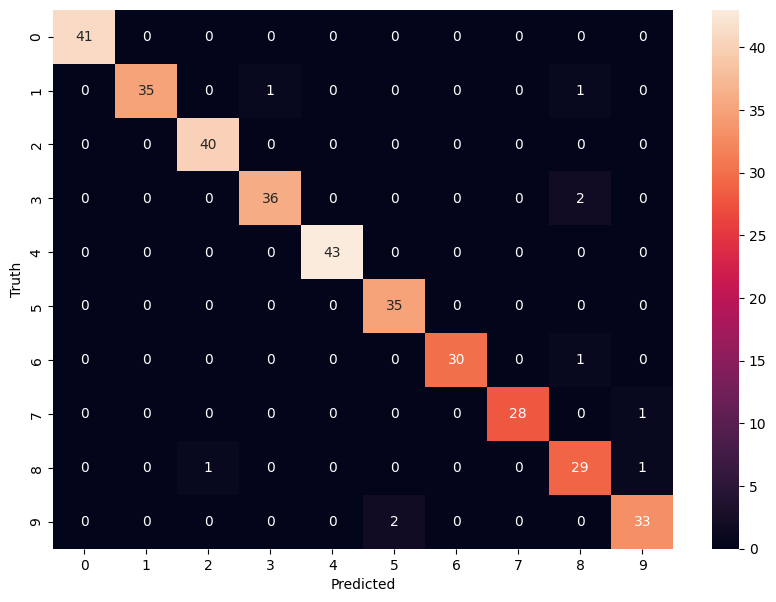

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=2000000))
pipeline.fit(x_train,y_train)

pipeline.score(x_test,y_test)

0.975

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
print(iris.data[0])
print(iris.target[0])
print(iris.target_names[0])
print(iris.feature_names[0])

[5.1 3.5 1.4 0.2]
0
setosa
sepal length (cm)
iris.csv


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.2)
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
model.score(x_test,y_test)

1.0

In [ ]:
# if model.predict([iris.data[0]]) == 0:
#   print(iris.target_names[0])
# elif model.predict([iris.data[0]]) == 1:
#   print(iris.target_names[1])
# else:
#   print(iris.target_names[2])

for i in model.predict(x_test):
    print(f'target: {i} name: {iris.target_names[i]}')

target: 2 name: virginica
target: 0 name: setosa
target: 0 name: setosa
target: 2 name: virginica
target: 0 name: setosa
target: 0 name: setosa
target: 0 name: setosa
target: 1 name: versicolor
target: 0 name: setosa
target: 2 name: virginica
target: 2 name: virginica
target: 0 name: setosa
target: 1 name: versicolor
target: 1 name: versicolor
target: 1 name: versicolor
target: 2 name: virginica
target: 1 name: versicolor
target: 1 name: versicolor
target: 0 name: setosa
target: 2 name: virginica
target: 2 name: virginica
target: 2 name: virginica
target: 0 name: setosa
target: 0 name: setosa
target: 0 name: setosa
target: 1 name: versicolor
target: 1 name: versicolor
target: 1 name: versicolor
target: 0 name: setosa
target: 2 name: virginica


Text(50.722222222222214, 0.5, 'Truth')

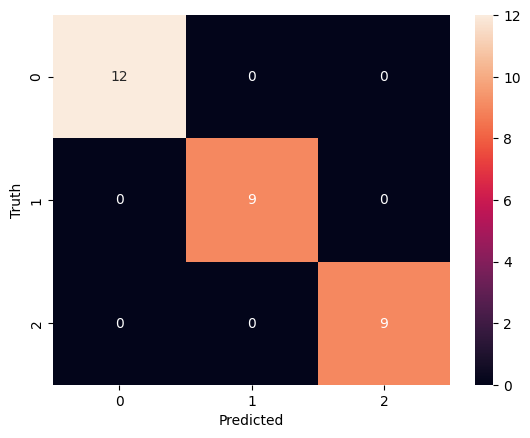

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sn
y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#Decision tree

In [ ]:
from google.colab import files
import io
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [ ]:
file_content = uploaded.get('titanic.csv')

if file_content:
  df = pd.read_csv(io.BytesIO(file_content))
  print(df)
else:
  print("File not found.")
#

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
pd.DataFrame(df, columns=['Survived','Sex','Age'])

,Survived,Sex,Age
0,0,male,22.0
1,1,female,38.0
2,1,female,26.0
3,1,female,35.0
4,0,male,35.0
...,...,...,...
886,0,male,27.0
887,1,female,19.0
888,0,female,NaN
889,1,male,26.0


In [ ]:
subdf = df[['Survived','Sex','Age','Fare']]
subdf

,Survived,Sex,Age,Fare
0,0,male,22.0,7.2500
1,1,female,38.0,71.2833
2,1,female,26.0,7.9250
3,1,female,35.0,53.1000
4,0,male,35.0,8.0500
...,...,...,...,...
886,0,male,27.0,13.0000
887,1,female,19.0,30.0000
888,0,female,NaN,23.4500
889,1,male,26.0,30.0000


In [ ]:
subdf.loc[:, 'Age'] = subdf['Age'].fillna(subdf['Age'].mean())
subdf.head(10)

,Survived,Sex,Age,Fare
0,0,male,22.000000,7.2500
1,1,female,38.000000,71.2833
2,1,female,26.000000,7.9250
3,1,female,35.000000,53.1000
4,0,male,35.000000,8.0500
5,0,male,29.699118,8.4583
6,0,male,54.000000,51.8625
7,0,male,2.000000,21.0750
8,1,female,27.000000,11.1333
9,1,female,14.000000,30.0708


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
subdf.loc[:,'Sex'] = le.fit_transform(subdf['Sex'])
subdf

,Survived,Sex,Age,Fare
0,0,1,22.000000,7.2500
1,1,0,38.000000,71.2833
2,1,0,26.000000,7.9250
3,1,0,35.000000,53.1000
4,0,1,35.000000,8.0500
...,...,...,...,...
886,0,1,27.000000,13.0000
887,1,0,19.000000,30.0000
888,0,0,29.699118,23.4500
889,1,1,26.000000,30.0000


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(subdf[['Sex','Age','Fare']],subdf['Survived'],test_size=0.2)
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
tmodel = DecisionTreeClassifier(criterion="entropy")
tmodel.fit(x_train,y_train)
tmodel.score(x_test,y_test)

0.7877094972067039

In [ ]:
model.score(x_test,y_test)

0.8100558659217877

In [ ]:
#for testing logical regression test
model2 = LogisticRegression()
model2.fit(x_train,y_train)
model2.score(x_test,y_test)

0.7877094972067039

In [ ]:
# for testing linear regression test
model3 = LinearRegression()
model3.fit(x_train,y_train)
model3.score(x_test,y_test)

0.43781208161940055

In [ ]:
# model.predict(x_test)
model.predict([[0,	19.000000,	30.00]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

Text(158.22222222222223, 0.5, 'Truth')

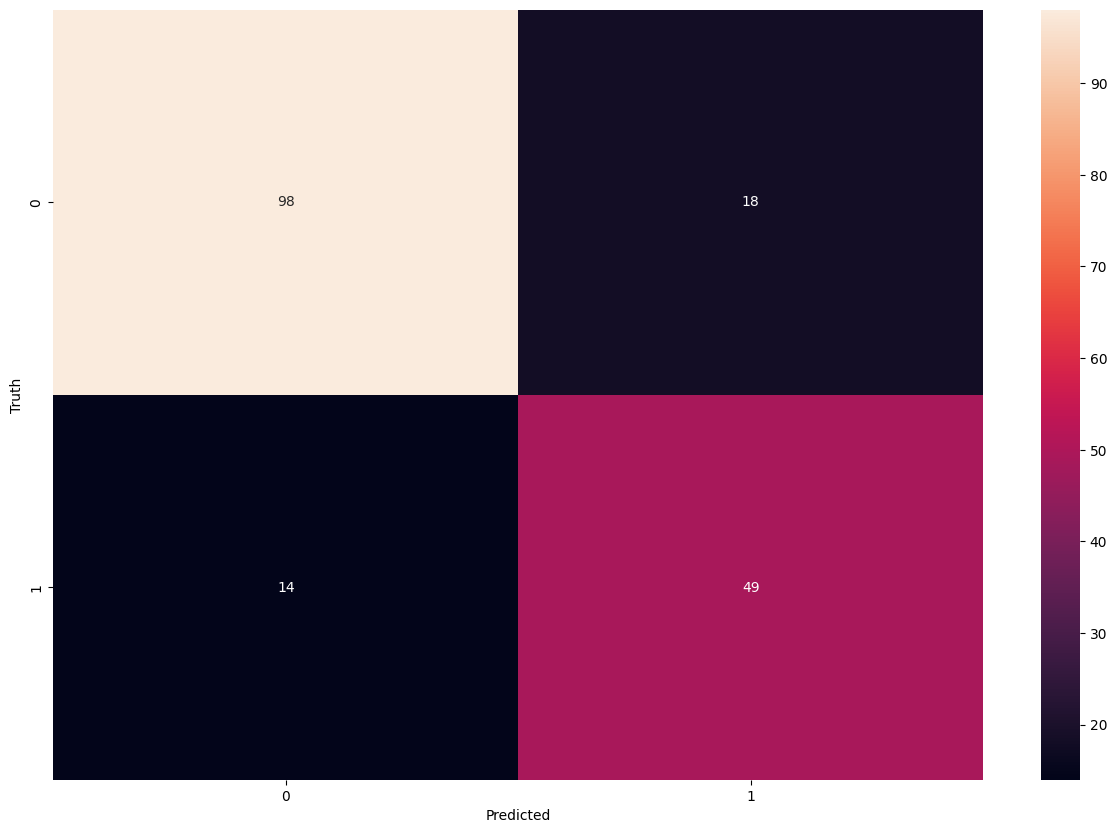

In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import tree
import seaborn as sn
cn = confusion_matrix(y_test, model.predict(x_test))
plt.figure(figsize=(15,10))
sn = sn.heatmap(cn, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
# tree.plot_tree(model)

Text(158.22222222222223, 0.5, 'Truth')

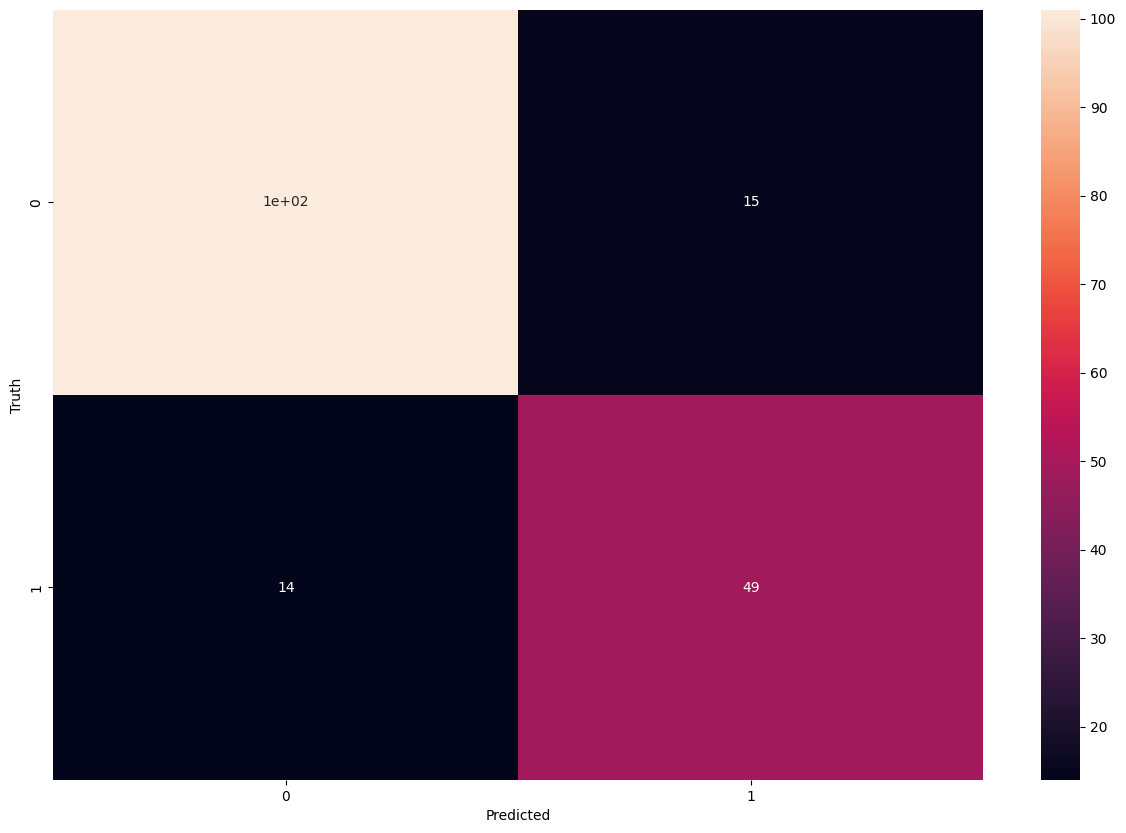

In [ ]:
# for logical regression
from sklearn import tree
import seaborn as sns # Use sns instead of sn to avoid overwriting
cn2 = confusion_matrix(y_test, model2.predict(x_test))
plt.figure(figsize=(15,10))
sns.heatmap(cn2, annot=True) # Call heatmap from seaborn (sns)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, model.predict(x_test))
print("Mean Squared Error in DecisionTreeClassifier:", mse)
mse = mean_squared_error(y_test, model2.predict(x_test))
print("Mean Squared error in Logical regression :", mse)
mse = mean_squared_error(y_test, model3.predict(x_test))
print("Mean Squared error in Linear regression: ",mse)

Mean Squared Error in DecisionTreeClassifier: 0.1787709497206704
Mean Squared error in Logical regression : 0.16201117318435754
Mean Squared error in Linear regression:  0.12822537709576545


Mean Squared Error: 0.12822537709576545


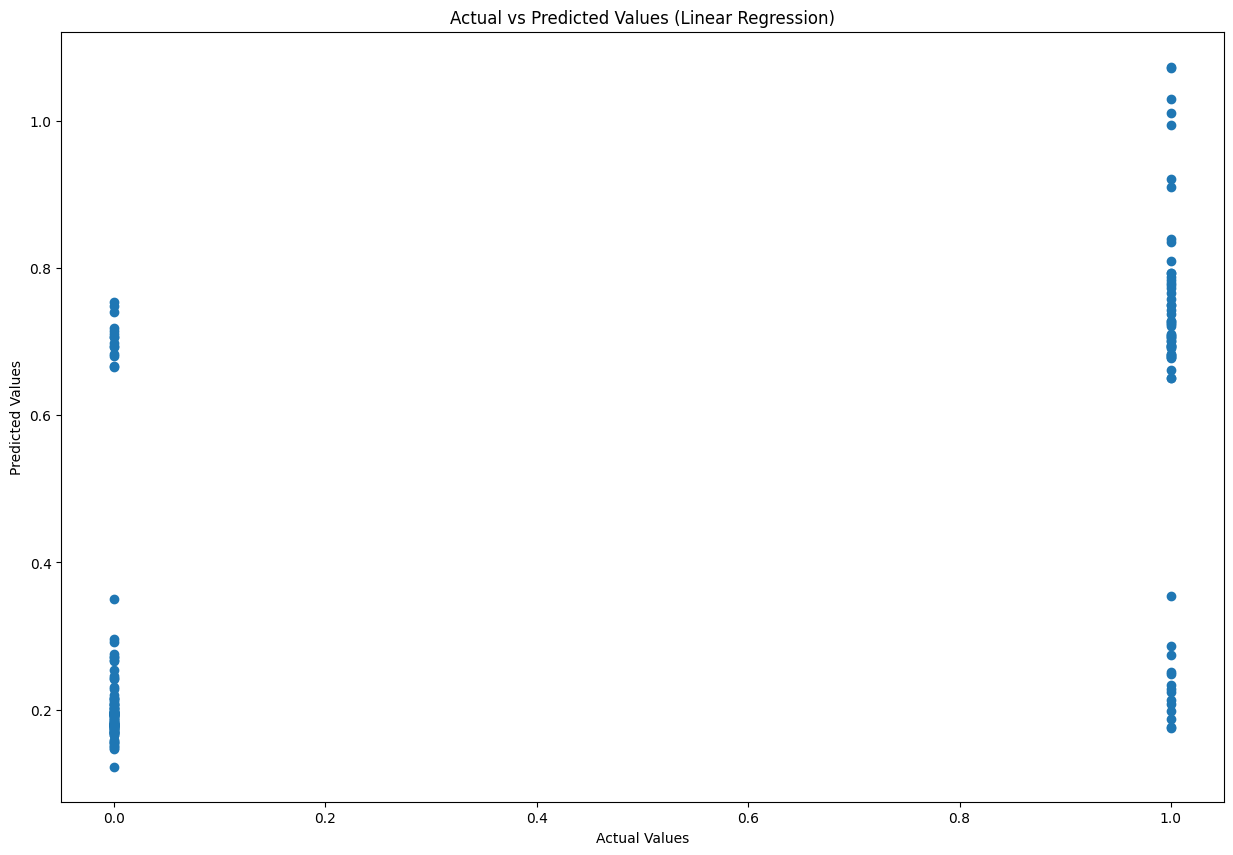

In [ ]:
# for linear regression
from sklearn import tree
import seaborn as sns2 # Use sns instead of sn to avoid overwriting
from sklearn.metrics import mean_squared_error # Import a regression metric

# Calculate mean squared error for regression
mse = mean_squared_error(y_test, model3.predict(x_test))
print("Mean Squared Error:", mse)

# Optionally, you could visualize the predictions vs actual values
plt.figure(figsize=(15,10))
plt.scatter(y_test, model3.predict(x_test))
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.show()

#SVM(Support Vector Machine)

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
df = pd.DataFrame(digits.data,digits.target)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('target',axis='columns'), df.target, test_size=0.2)

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(x_train, y_train)

SVC()

In [ ]:
model.score(x_test,y_test)

0.9805555555555555

Text(95.72222222222221, 0.5, 'Truth')

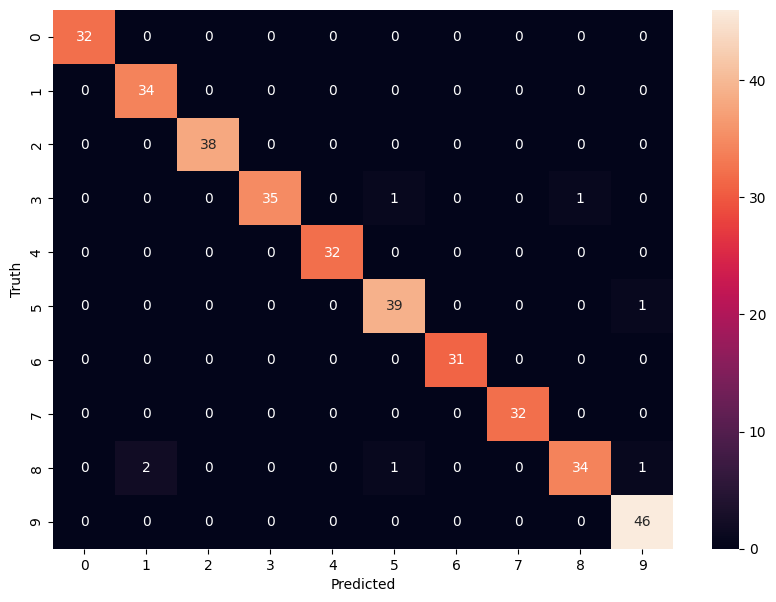

In [ ]:
from sklearn.metrics import confusion_matrix
y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model1 = SVC(kernel='linear')
model1.fit(x_train, y_train)
model1.score(x_test,y_test)

0.9722222222222222

Text(95.72222222222221, 0.5, 'Truth')

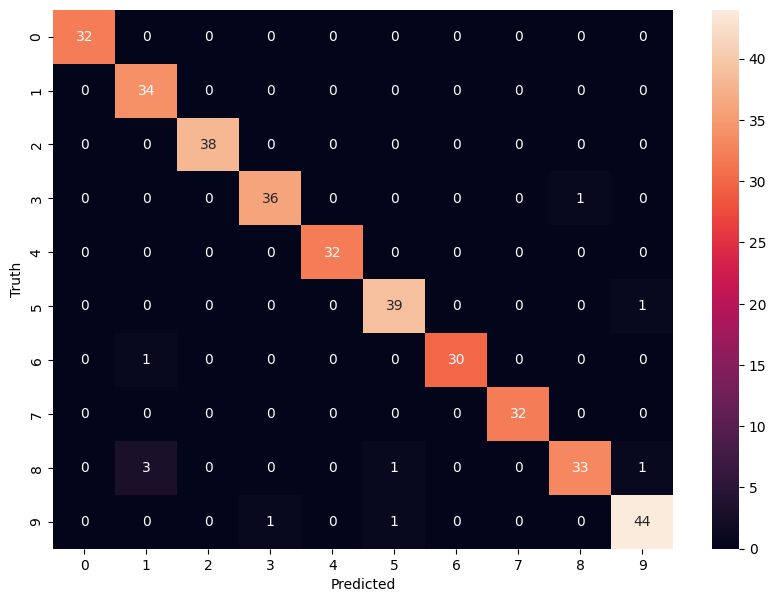

In [ ]:
cm1 = confusion_matrix(y_test, model1.predict(x_test))
plt.figure(figsize = (10,7))
sn.heatmap(cm1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model2 = SVC(kernel='poly')
model2.fit(x_train, y_train)
model2.score(x_test,y_test)

0.9861111111111112

Text(95.72222222222221, 0.5, 'Truth')

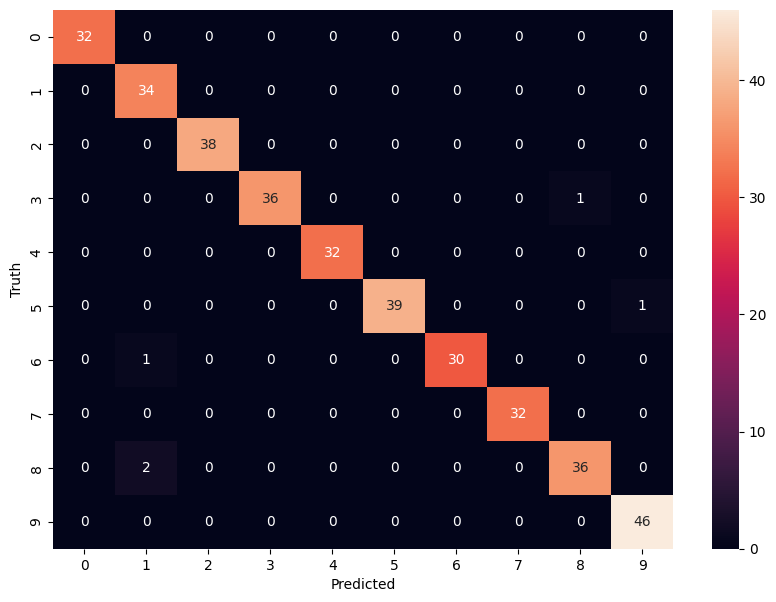

In [ ]:
cm2 = confusion_matrix(y_test, model2.predict(x_test))
plt.figure(figsize = (10,7))
sn.heatmap(cm2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model3 = SVC(kernel='sigmoid')
model3.fit(x_train, y_train)
model3.score(x_test,y_test)

0.8944444444444445

Text(95.72222222222221, 0.5, 'Truth')

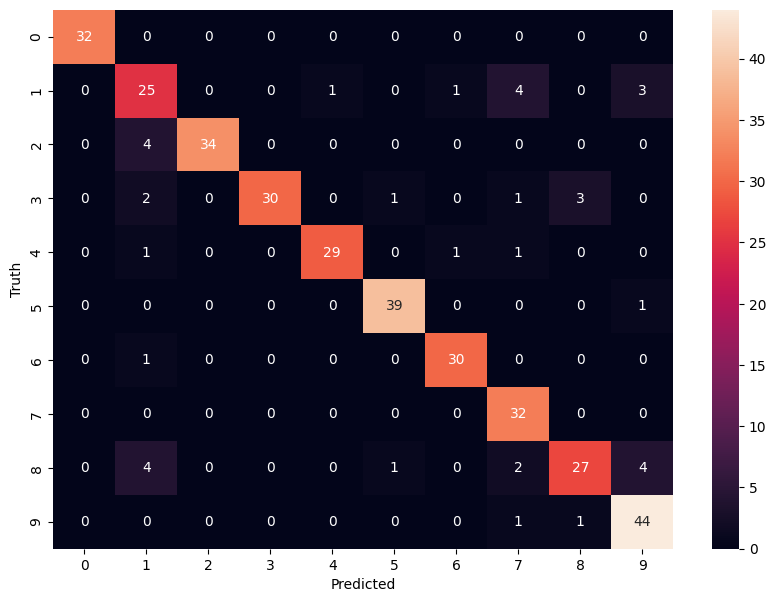

In [ ]:
cm3 = confusion_matrix(y_test, model3.predict(x_test))
plt.figure(figsize = (10,7))
sn.heatmap(cm3, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#Assignment Salary Prediction

In [ ]:
from google.colab import files
import io
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
uploaded = files.upload()

Saving Salary Data.csv to Salary Data.csv


In [ ]:
files_content = uploaded.get('Salary Data.csv')

if files_content:
  df = pd.read_csv(io.BytesIO(files_content))
  print(df)
else:
  print("File not found.")
#

    Experience Years  Salary
0                1.1   39343
1                1.2   42774
2                1.3   46205
3                1.5   37731
4                2.0   43525
5                2.2   39891
6                2.5   48266
7                2.9   56642
8                3.0   60150
9                3.2   54445
10               3.2   64445
11               3.5   60000
12               3.7   57189
13               3.8   60200
14               3.9   63218
15               4.0   55794
16               4.0   56957
17               4.1   57081
18               4.3   59095
19               4.5   61111
20               4.7   64500
21               4.9   67938
22               5.1   66029
23               5.3   83088
24               5.5   82200
25               5.9   81363
26               6.0   93940
27               6.2   91000
28               6.5   90000
29               6.8   91738
30               7.1   98273
31               7.9  101302
32               8.2  113812
33            

Text(0, 0.5, 'Salary')

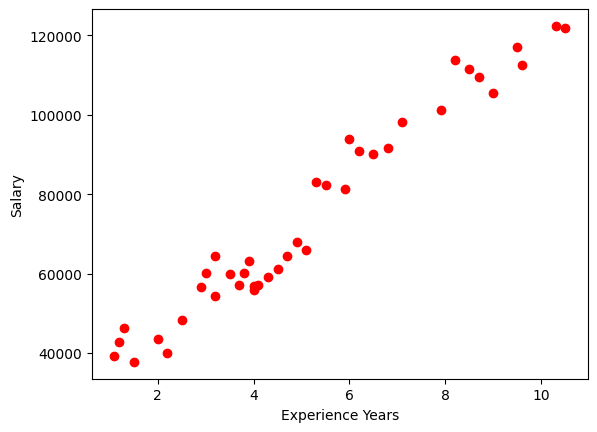

In [ ]:
plt.scatter(df['Experience Years'],df['Salary'],color='red')
plt.xlabel('Experience Years')
plt.ylabel('Salary')

In [ ]:
x = df['Experience Years']
y = df['Salary']

Text(0, 0.5, 'Salary')

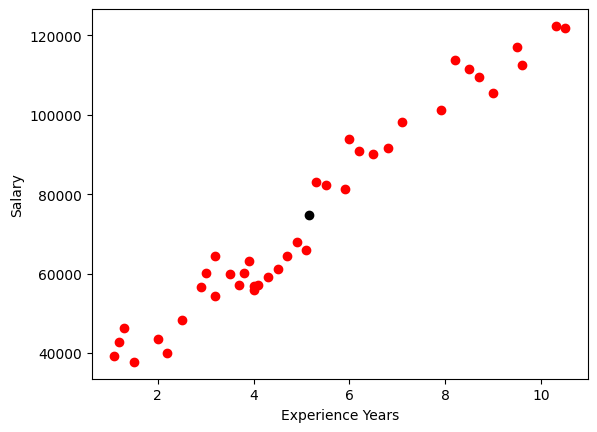

In [ ]:
plt.scatter(x.mean(),y.mean(),color="black")
plt.scatter(df['Experience Years'],df['Salary'],color='red')
plt.xlabel('Experience Years')
plt.ylabel('Salary')


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
model = LinearRegression()
model.fit(x_train.values.reshape(-1,1),y_train)

LinearRegression()

In [ ]:
model.score(x_test.values.reshape(-1,1),y_test)

0.8916044834839076

In [ ]:
model.predict(x_test.values.reshape(-1,1))

array([ 83224.7332578 ,  74772.98721261,  64443.07537961,  63503.9924857 ,
       116092.63454463,  72894.82142479,  62564.90959179,  64443.07537961])

Text(0, 0.5, 'Salary')

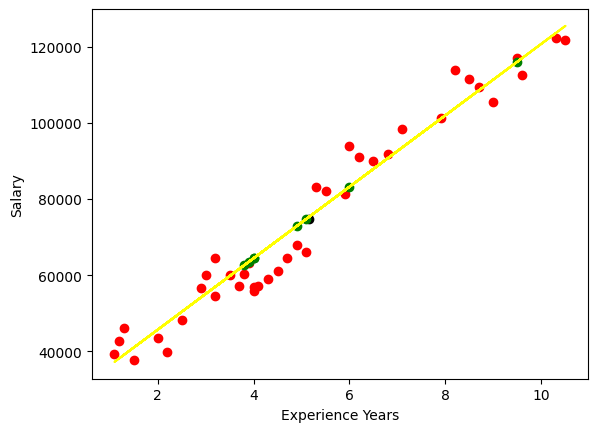

In [ ]:
plt.scatter(x.mean(),y.mean(),color="black")
plt.scatter(df['Experience Years'],df['Salary'],color='red')
plt.plot(x_train, model.predict(x_train.values.reshape(-1,1)), color='yellow')
plt.scatter(x_test, model.predict(x_test.values.reshape(-1,1)), color='green')
plt.xlabel('Experience Years')
plt.ylabel('Salary')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix
mse = mean_squared_error(y_test, model.predict(x_test.values.reshape(-1,1)))
mae = mean_absolute_error(y_test, model.predict(x_test.values.reshape(-1,1)))
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 44141845.92124745
Mean Absolute Error: 5509.811708959269


#Assignment risk Prediction

In [ ]:
from google.colab import files
import io
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
uploaded = files.upload()

Saving car driving risk analysis.csv to car driving risk analysis.csv


In [ ]:
files_content = uploaded.get('car driving risk analysis.csv')

if files_content:
  df = pd.read_csv(io.BytesIO(files_content))
  print(df)
else:
  print("File not found.")
#

    speed  risk
0     200    95
1      90    20
2     300    98
3     110    60
4     240    72
5     115    10
6      50     7
7     230    85
8     190    45
9     260    91
10    290    82
11    185    59
12    310    93
13     95    18
14     30     2


Text(0, 0.5, 'risk')

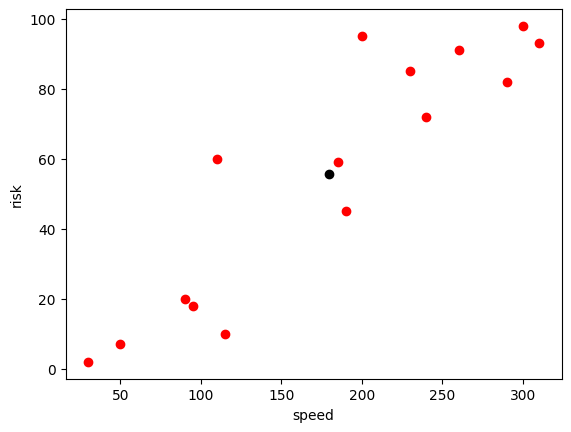

In [ ]:
plt.scatter(df['speed'],df['risk'],color='red')
plt.scatter(df['speed'].mean(),df['risk'].mean(),color="black")
plt.xlabel('speed')
plt.ylabel('risk')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df['speed'],df['risk'],test_size=0.4)

In [ ]:
x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
model.score(x_test,y_test)

0.7500647667067492

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

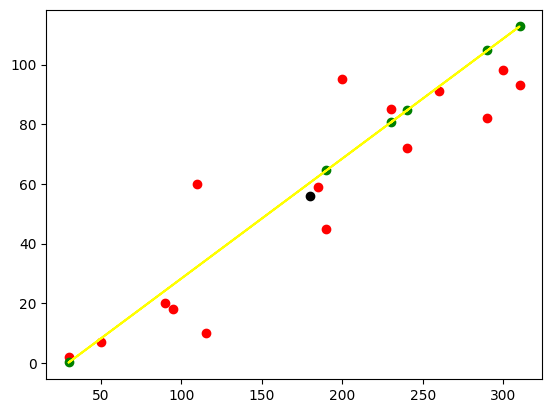

In [ ]:
plt.scatter(df['speed'],df['risk'],color='red')
plt.scatter(df['speed'].mean(),df['risk'].mean(),color="black")
plt.plot(x_test, model.predict(x_test), color='yellow')
plt.scatter(x_test, model.predict(x_test), color='green')
plt

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, model.predict(x_test))
mae = mean_absolute_error(y_test, model.predict(x_test))
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 244.5546831320767
Mean Absolute Error: 13.461666183060913


###try with logical regression(Failed)

In [ ]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(max_iter=10000)
model2.fit(x_train,y_train)
model2.score(x_test,y_test)

0.0

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

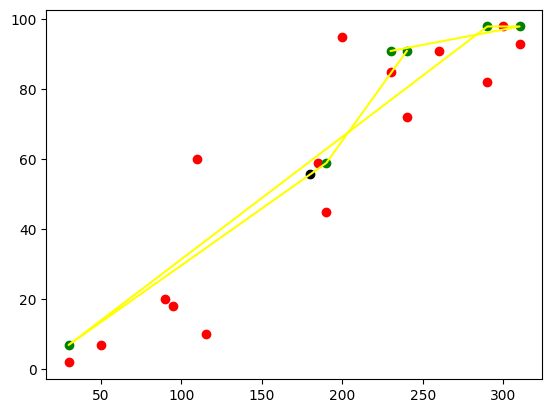

In [ ]:
plt.scatter(df['speed'],df['risk'],color='red')
plt.scatter(df['speed'].mean(),df['risk'].mean(),color="black")
plt.plot(x_test, model2.predict(x_test), color='yellow')
plt.scatter(x_test, model2.predict(x_test), color='green')
plt

#Assignment Predict Male Female

In [1]:
from google.colab import files
import io
import pandas as pd
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
uploaded = files.upload()

Saving male female.csv to male female.csv


In [3]:
file_content = uploaded.get('male female.csv')

if file_content:
  df = pd.read_csv(io.BytesIO(file_content))
  print(df)
else:
  print("File not found.")
#

   height  weight  shoe size  gender
0     181      80         44    male
1     177      70         43  female
2     160      60         38  female
3     154      54         37  female
4     166      65         40    male
5     190      90         47    male
6     175      64         39    male
7     171      75         42  female
8     185      85         43  female
9     169      71         42    male


Text(0, 0.5, 'Weight')

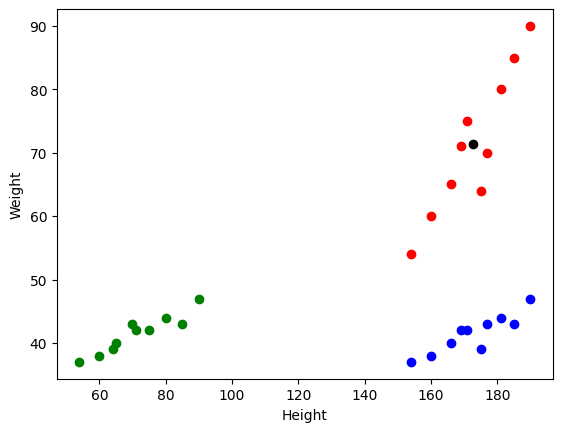

In [4]:
plt.scatter(df['height'],df['weight'],color='red')
plt.scatter(df['height'].mean(),df['weight'].mean(),color="black")
plt.scatter(df['height'],df['shoe size'],color="blue")
plt.scatter(df['weight'],df['shoe size'],color="green")
plt.xlabel('Height')
plt.ylabel('Weight')

#####3d plot

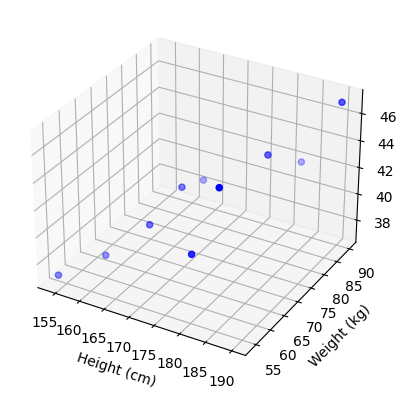

In [ ]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import pandas as pd

# # Your data
# data = {
#     'height': [181, 177, 160, 154, 166, 190, 175, 171, 185, 169],
#     'weight': [80, 70, 60, 54, 65, 90, 64, 75, 85, 71],
#     'shoe_size': [44, 43, 38, 37, 40, 47, 39, 42, 43, 42]
# }

# # Convert to DataFrame
# df = pd.DataFrame(data)

# # Create a 3D scatter plot
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # Plot the points
# ax.scatter(df['height'], df['weight'], df['shoe_size'], c='blue', marker='o')

# # Set labels
# ax.set_xlabel('Height (cm)')
# ax.set_ylabel('Weight (kg)')
# ax.set_zlabel('Shoe Size')

# # Show the plot
# plt.show()


In [5]:
x_train, x_test, y_train, y_test = train_test_split(df[['height','weight','shoe size']],df['gender'],test_size=0.2)

In [6]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

   height  weight  shoe size
8     185      85         43
0     181      80         44
7     171      75         42
1     177      70         43
3     154      54         37
6     175      64         39
5     190      90         47
4     166      65         40
   height  weight  shoe size
9     169      71         42
2     160      60         38
8    female
0      male
7    female
1    female
3    female
6      male
5      male
4      male
Name: gender, dtype: object
9      male
2    female
Name: gender, dtype: object


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train= le.fit_transform(y_train)
y_test = le.transform(y_test)
print(y_train)
print(y_test)

[0 1 0 0 0 1 1 1]
[1 0]


In [13]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [14]:
model.score(x_test,y_test)

0.5

In [15]:
model.predict(x_test)

array([0, 0])

In [28]:
model.coef_

array([[ 0.17097851, -0.14289556,  0.11326053]])

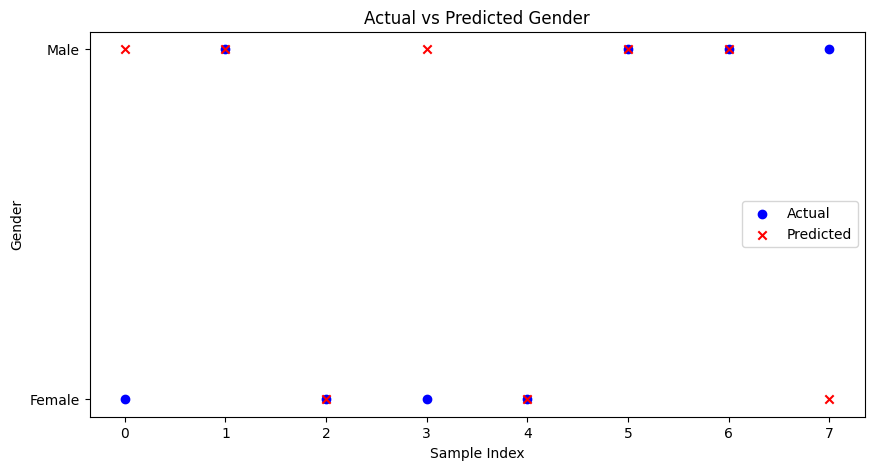

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already trained your model
# Predict the test set
y_pred = model.predict(x_train)

# Plotting
plt.figure(figsize=(10, 5))

# Plotting the actual values
plt.scatter(np.arange(len(x_train)), y_train, color='blue', label='Actual', marker='o')

# Plotting the predicted values
plt.scatter(np.arange(len(y_pred)), y_pred, color='red', label='Predicted', marker='x')

# Add labels and title
plt.xlabel('Sample Index')
plt.ylabel('Gender')
plt.title('Actual vs Predicted Gender')
plt.yticks([0, 1], labels=['Female', 'Male'])
plt.legend()

# Show the plot
plt.show()


In [16]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion='entropy')
model2.fit(x_train,y_train)
model2.score(x_test,y_test)

0.5

In [11]:
from sklearn.svm import SVC
model3 = SVC(kernel="rbf")
model3.fit(x_train,y_train)
model3.score(x_test,y_test)

0.5